In [3]:
%cd /content/drive/MyDrive/_main_/1_FL/asl_poses/points

/content/drive/MyDrive/_main_/1_FL/asl_poses/points


### mediapipe installation

In [ ]:
!pip install mediapipe
!pip install polars ### faster than pandas

In [4]:
import sys
import os
import os.path as osp
from glob import glob
from pathlib import Path

import cv2
import math
import numpy as np
import pandas as pd
import polars as pl
from PIL import Image
import mediapipe as mp
import matplotlib.pyplot as plt
from math import atan2, degrees

import yaml
from utils_asl import *
from google.colab.patches import cv2_imshow

In [63]:
### initialize instance
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,
                  model_complexity=2,
                  enable_segmentation=True, ### filter background
                  min_detection_confidence=0.5)

tensor shape: (120, 224, 420, 3)
frame shape: (224, 420, 3)


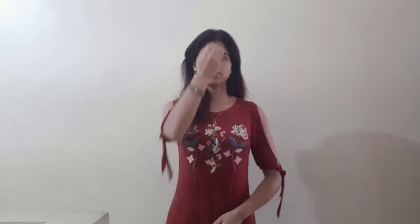

In [68]:
bd = glob("data/*BD*") ### tomas en video del gesto "buenos dias"

vidd = 30
tensor = video2tensor(bd[vidd]) ### video to frames
print("tensor shape:", tensor.shape)
kl = cv2.cvtColor(tensor[15], cv2.COLOR_BGR2RGB) ### colorize frame
print("frame shape:", kl.shape)
Image.fromarray(kl) ### show

### Human pose processing

In [65]:
image = kl.copy()

image_height, image_width, _ = image.shape
# Convert the BGR image to RGB before processing
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) ### process frame to get critial points

BG_COLOR = (192, 192, 192) # gray

annotated_image = image.copy()

condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(image.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR
annotated_image = np.where(condition, annotated_image, bg_image)

In [73]:
dir(results)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'pose_landmarks',
 'pose_world_landmarks',
 'segmentation_mask']

In [ ]:
### results.pose_landmarks # corrdenadas en funcion del shap de la imagen

### Draw pose landmarks on the image | Pose humana dibujada sobre la imagen original

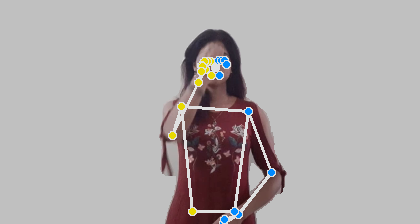

In [67]:
mp_drawing.draw_landmarks(
    image=annotated_image,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

Image.fromarray(annotated_image) ### show result